In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Evenly sample N test points in [-5,5]
N = 50
xs = np.linspace(-5,5,N)
#Build a sine curve on these points
f = [np.sin(x) for x in xs]

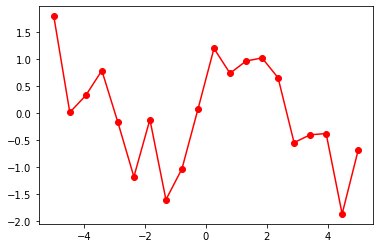

In [8]:
#We'll also pick M evenly spaced training points in [-5,5]
M = 20
ws = np.linspace(-5,5,M)
tr= [np.sin(w) for w in ws]
#Add uniform [-1,1] noise pointwise
g = tr + (2*np.random.rand(M)-np.ones(M))
#Plot the function
plt.plot(ws,g,'r-o')

In [10]:
#Fit a degree-d polynomial to the noisy data on the training points
d = 1
z = np.polyfit(ws,g,d)
predict = np.poly1d(z)
#Compute the values of the polynomial on the test points
h = [predict(x) for x in xs]

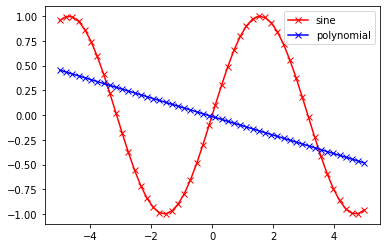

In [12]:
#Plot the original curve and the fitted polynomial 
plt.plot(xs,f,'rx-')
plt.plot(xs,h,'bx-')
plt.legend(['sine','polynomial'])

In [13]:
#How does this line change as the initial noise is varied?
#Let's sample with noise 100 times and record all the predictions
X = np.zeros((100,N))
#For i between 1 and 100
for i in range(100):
    #Generate a noisy sine curve
    g= tr + (2*np.random.rand(M)-np.ones(M))
    #Fit this to a degree d polynomial
    z = np.polyfit(ws,g,d)
    predict = np.poly1d(z)
    #Store the predicted values in the ith row of the matrix X
    X[i,:] = [predict(x) for x in xs]
    

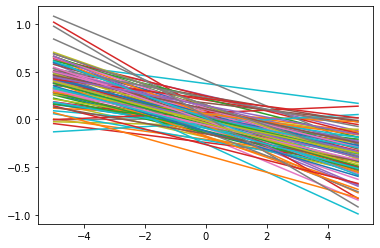

In [14]:
#Let's plot all the resulting curves!
for i in range(100):
    plt.plot(xs,X[i,:])

In [19]:
#We now define some functions that compute the MSE, bias squared, and variance of a set of a predictions for 
#a single value y.
def MSE(preds, y):
    S = 0
    for pred in preds:
        S+=(pred - (y+np.random.normal()))**2
    return S/len(preds)

def bias_squared(preds,y):
    S = 0
    for pred in preds:
        S+=(pred - y)
    S/=len(preds)
    return S**2

def variance(preds):
    return np.var(preds)


In [25]:
#We average the MSE, squared bias, and variance over all the points in xs
average_MSE = np.average([MSE(X[:,i],f[i]) for i in range(N)])
average_bias_squared = np.average([bias_squared(X[:,i],f[i]) for i in range(N)])
average_var = np.average([variance(X[:,i]) for i in range(N)])

In [26]:
#...and print them:
print("Average MSE: ", average_MSE)
print("Average Bias Squared: ",average_bias_squared)
print("Average Variance: ", average_var)

Average MSE:  1.4889254490894535
Average Bias Squared:  0.5001810477850472
Average Variance:  0.028896086744733054


In [ ]:
#Challenge 1: Compute average_MSE - average_bias_squared - average_var. What number do you get? Why?

In [1164]:
#Challenge 2: Plot (Average) MSE, Bias^2, and Variance as d is varied. What do you observe?

In [1165]:
#Challenge 3: What happens if M is lowered or raised?

In [1166]:
#Challenge 4: What happens if the level of noise is changed? (careful to change the noise model in the MSE function)

In [1167]:
#Challenge 5: Replace the sine curve with a line, a quadratic, or another function of your choosing,
#and make some observations.